# Loss curves
## Comparison of different trainings via train & val loss

In [1]:
# plot loss curves directly after training

import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep

plt.style.use(hep.cms.style.ROOT)

In [10]:
dirz = {
    'nominal': f'/net/scratch_cms3a/hschoenen/deepjet/results/nominal/',
    'fgsm-0_01': f'/net/scratch_cms3a/hschoenen/deepjet/results/fgsm-0_01/',
    'fgsm-0_02': f'/net/scratch_cms3a/hschoenen/deepjet/results/fgsm-0_02/',
    'fgsm-0_05': f'/net/scratch_cms3a/hschoenen/deepjet/results/fgsm-0_05/',
}
save_dir = f'/net/scratch_cms3a/hschoenen/deepjet/plots/loss_curves/'

In [11]:
colors = {
    'nominal' : ['darkblue', 'blue'],
    'fgsm-0_01' : ['peru', 'orange'],
    'fgsm-0_02' : ['darkred', 'red'],
    'fgsm-0_05' : ['darkred', 'red'],
    }

In [12]:
leg_text = {
    'nominal' : 'nominal, bsize=4000',
    'fgsm-0_01' : r'fgsm, ($\epsilon=0.01$, bsize=4000)',
    'fgsm-0_02' : r'fgsm, ($\epsilon=0.02$, bsize=4000)',
    'fgsm-0_05' : r'fgsm, ($\epsilon=0.05$, bsize=4000)',
    }

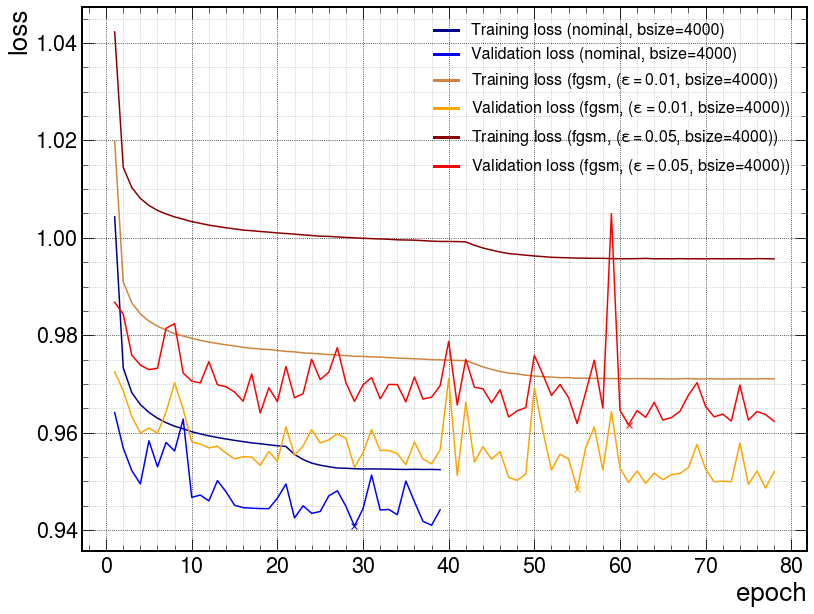

In [13]:
# specify models
model_names = ['nominal','fgsm-0_01','fgsm-0_05']#'fgsm-0_02','fgsm-0_01-new_epsilons',
# specify loss: 'training_validation' , 'training' , 'validation'
plot_mode = 'training_validation'
# specify: plot losses from batches in 1st epoch?
include_batch_losses = False
# specify: put a marker at the best validation loss
mark_best_loss = True

plt.figure(1,figsize=[13,10])
plt.style.use(hep.cms.style.ROOT)
plt.grid(which='minor', alpha=0.85)
plt.grid(which='major', alpha=0.95, color='black')
title = ''
for model in model_names:
    title = title + model + '_'
    batch_training_losses = np.load(dirz[model]+'loss_values/batch_training_losses.npy', allow_pickle=True)
    batch_validation_losses = np.load(dirz[model]+'loss_values/batch_validation_losses.npy', allow_pickle=True)
    epoch_training_losses = np.load(dirz[model]+'loss_values/epoch_training_losses.npy', allow_pickle=True)
    epoch_validation_losses = np.load(dirz[model]+'loss_values/epoch_validation_losses.npy', allow_pickle=True)
    # losses from batches of first epoch
    indices = np.nonzero(batch_validation_losses)[0]
    n_batches = len(batch_validation_losses)
    batch_axis = np.arange(0,1+1/n_batches,1/n_batches)[indices]
    batch_training_losses = batch_training_losses[indices]
    batch_validation_losses = batch_validation_losses[indices]
    # losses from all epochs
    if mark_best_loss:
        best_epoch = epoch_validation_losses[-1]
        best_loss = epoch_validation_losses[int(best_epoch)-1]
    n_epochs = len(epoch_training_losses)-1
    epoch_axis = np.arange(1,n_epochs+1,1)
    epoch_training_losses = epoch_training_losses[:-1]
    epoch_validation_losses = epoch_validation_losses[:-1]

    if include_batch_losses:
        x = np.concatenate((batch_axis,epoch_axis))
        y_train = np.concatenate((batch_training_losses,epoch_training_losses))
        y_val = np.concatenate((batch_validation_losses,epoch_validation_losses))
    else:
        x = epoch_axis
        y_train = epoch_training_losses
        y_val = epoch_validation_losses
    if 'training' in plot_mode:
        plt.plot(x, y_train, color=colors[model][0], label=f'Training loss ({leg_text[model]})')
    if 'validation' in plot_mode:
        plt.plot(x, y_val, color=colors[model][1], label=f'Validation loss ({leg_text[model]})')
        if mark_best_loss:
            plt.plot([best_epoch], [best_loss], color=colors[model][1], marker='x')
plt.xlabel('epoch')
plt.ylabel('loss')
leg = plt.legend(fontsize=16)
for legobj in leg.legend_handles:
    legobj.set_linewidth(3.0)

plt.savefig(save_dir + title + plot_mode + '.pdf', bbox_inches='tight')
plt.savefig('loss.pdf', bbox_inches='tight')

In [14]:
model = 'fgsm-0_05'
a = np.load(dirz[model]+'loss_values/epoch_training_losses.npy')
print(len(a))

79
